In [1]:
# Dataframe
from json import load
import pandas as pd
# Plot
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# NN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
# Model training
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




/Users/jesperhelen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-09-24 09:57:06.971552: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:

# Define the URL from which to fetch the CSV data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Use pandas to read the CSV data from the specified URL and store it in a DataFrame 'df'.
df = pd.read_csv(url)
# Display the first 10 rows of the DataFrame 'df'.


In [3]:
df = df.iloc[:1000]
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)
df.head()

,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,69,0,82,33,99.925373
1,35,0,82,52,100.191176
2,7,0,82,10,99.681159
3,74,15,82,27,99.385714
4,-3,0,109,17,116.298507


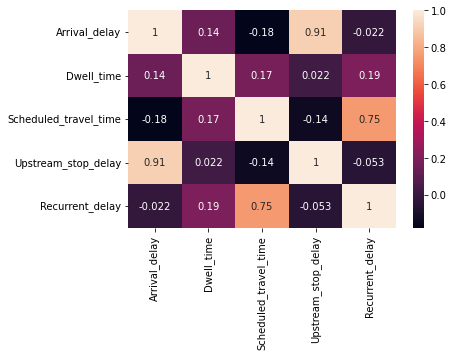

In [4]:
# Calculate the correlation matrix for all columns in the DataFrame 'df'.
corr_matrix = df.corr()
# Sort the correlations between the 'Arrival_delay' column and other columns in descending order.
# This shows the correlation coefficients for each column with respect to 'Arrival_delay'.
correlations_with_arrival_delay = corr_matrix['Arrival_delay'].sort_values(ascending=False)
ax = sns.heatmap(corr_matrix, annot=True)

In [9]:
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can choose to add the dropout layer or not***************************

def construct_network_model(i):
  drop = [0.1,0.2,0.3,0.4,0.5,0.5,0.4,0.3,0.2]
  # Create a Sequential model, which is a linear stack of layers.
  model = Sequential()

  # Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
  model.add(Dense(16*i, activation='relu', input_dim=4))

  # # Add a Dropout layer with a dropout rate of 0.5.
  #model.add(Dropout(drop[i-1]))

  # Add another Dense layer with 64 units and ReLU activation.
  model.add(Dense(32*i, activation='relu'))

  # # Add another Dropout layer with a dropout rate of 0.5.
  model.add(Dropout(drop[i-1]))
  print("Drop:", drop[i-1])
  print("Layer one",16*i)
  print("Layer two",32*i)


  # Add a final Dense layer with 1 unit (typically used for regression tasks).
  model.add(Dense(1))
  return model


1
Drop: 0.1
Layer one 16
Layer two 32

Epoch 1: val_mae improved from inf to 32.43692, saving model to weights.best.h5


/Users/jesperhelen/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 32.43692 to 30.34141, saving model to weights.best.h5

Epoch 3: val_mae did not improve from 30.34141

Epoch 4: val_mae did not improve from 30.34141

Epoch 5: val_mae did not improve from 30.34141

Epoch 6: val_mae did not improve from 30.34141

Epoch 7: val_mae did not improve from 30.34141
7/7 [==============================] - 0s 2ms/step
--------------------------------------this is result of the trained model---------------------------------------------
Mean Absolute Error: 30.90822568655014
Mean Squared Error: 1704.6470098795344
R-squared: 0.8555137822557023
7/7 [==============================] - 0s 2ms/step
--------------------------------------this is result of the model loaded from the local path---------------------------------------------
Mean Absolute Error: 30.90822568655014
Mean Squared Error: 1704.6470098795344
R-squared: 0.8555137822557023


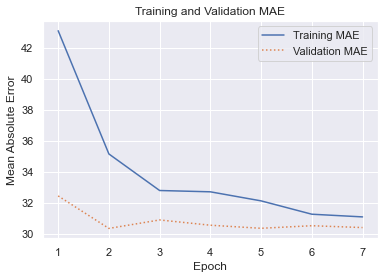

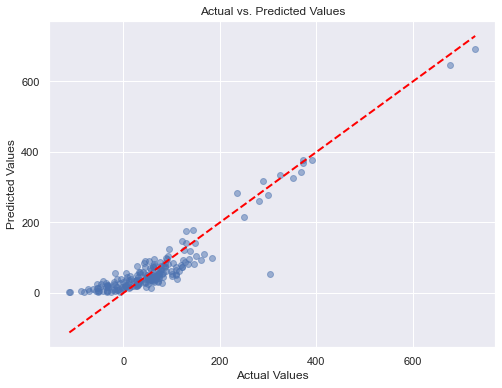

2
Drop: 0.2
Layer one 32
Layer two 64

Epoch 1: val_mae improved from inf to 39.70522, saving model to weights.best.h5

Epoch 2: val_mae improved from 39.70522 to 31.98082, saving model to weights.best.h5


/Users/jesperhelen/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_mae did not improve from 31.98082

Epoch 4: val_mae did not improve from 31.98082

Epoch 5: val_mae did not improve from 31.98082

Epoch 6: val_mae did not improve from 31.98082

Epoch 7: val_mae did not improve from 31.98082
7/7 [==============================] - 0s 2ms/step
--------------------------------------this is result of the trained model---------------------------------------------
Mean Absolute Error: 33.56185298681259
Mean Squared Error: 2002.599347009499
R-squared: 0.830259283224243
7/7 [==============================] - 0s 3ms/step
--------------------------------------this is result of the model loaded from the local path---------------------------------------------
Mean Absolute Error: 33.56185298681259
Mean Squared Error: 2002.599347009499
R-squared: 0.830259283224243


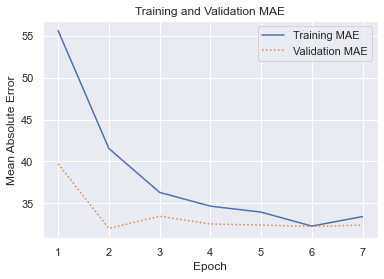

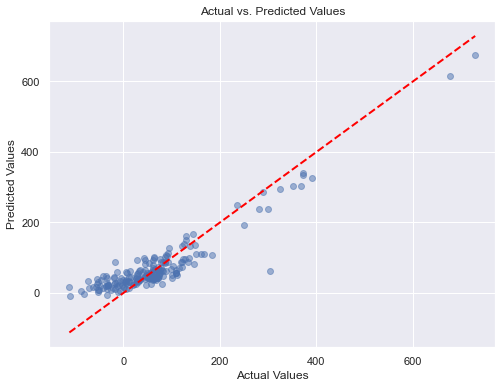

3
Drop: 0.3
Layer one 48
Layer two 96

Epoch 1: val_mae improved from inf to 35.66689, saving model to weights.best.h5

Epoch 2: val_mae improved from 35.66689 to 32.26547, saving model to weights.best.h5


/Users/jesperhelen/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_mae did not improve from 32.26547

Epoch 4: val_mae improved from 32.26547 to 31.75681, saving model to weights.best.h5

Epoch 5: val_mae did not improve from 31.75681

Epoch 6: val_mae did not improve from 31.75681

Epoch 7: val_mae did not improve from 31.75681

Epoch 8: val_mae improved from 31.75681 to 31.43175, saving model to weights.best.h5

Epoch 9: val_mae did not improve from 31.43175

Epoch 10: val_mae did not improve from 31.43175

Epoch 11: val_mae did not improve from 31.43175

Epoch 12: val_mae did not improve from 31.43175

Epoch 13: val_mae did not improve from 31.43175
7/7 [==============================] - 0s 2ms/step
--------------------------------------this is result of the trained model---------------------------------------------
Mean Absolute Error: 29.87023087993264
Mean Squared Error: 1556.908994663012
R-squared: 0.868036085648704
7/7 [==============================] - 0s 3ms/step
--------------------------------------this is result of the model

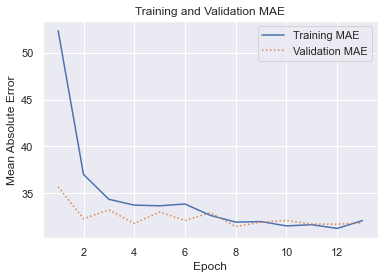

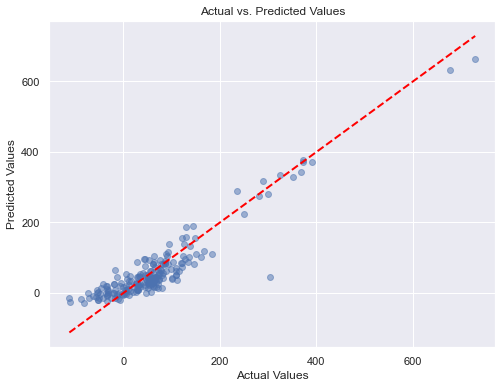

4
Drop: 0.4
Layer one 64
Layer two 128

Epoch 1: val_mae improved from inf to 47.40685, saving model to weights.best.h5

Epoch 2: val_mae improved from 47.40685 to 35.47152, saving model to weights.best.h5


/Users/jesperhelen/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_mae improved from 35.47152 to 34.60959, saving model to weights.best.h5

Epoch 4: val_mae did not improve from 34.60959

Epoch 5: val_mae improved from 34.60959 to 33.30991, saving model to weights.best.h5

Epoch 6: val_mae improved from 33.30991 to 31.40163, saving model to weights.best.h5

Epoch 7: val_mae did not improve from 31.40163

Epoch 8: val_mae did not improve from 31.40163

Epoch 9: val_mae did not improve from 31.40163

Epoch 10: val_mae did not improve from 31.40163

Epoch 11: val_mae did not improve from 31.40163
7/7 [==============================] - 0s 3ms/step
--------------------------------------this is result of the trained model---------------------------------------------
Mean Absolute Error: 30.868805227279662
Mean Squared Error: 1683.6657737181395
R-squared: 0.8572921559829257
7/7 [==============================] - 0s 3ms/step
--------------------------------------this is result of the model loaded from the local path------------------------------

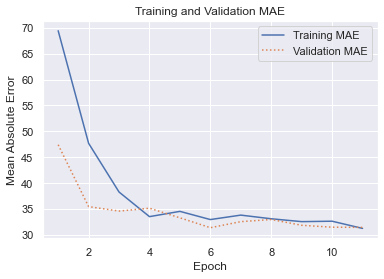

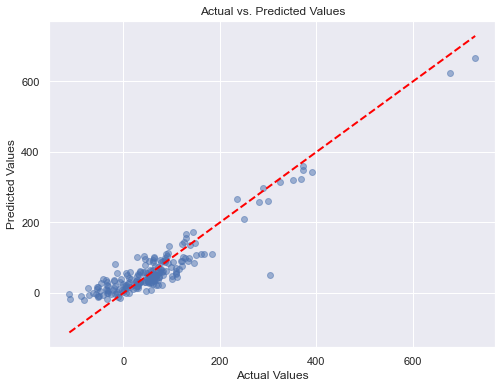

5
Drop: 0.5
Layer one 80
Layer two 160

Epoch 1: val_mae improved from inf to 40.07505, saving model to weights.best.h5

Epoch 2: val_mae improved from 40.07505 to 32.49400, saving model to weights.best.h5


/Users/jesperhelen/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_mae did not improve from 32.49400

Epoch 4: val_mae did not improve from 32.49400

Epoch 5: val_mae improved from 32.49400 to 31.49688, saving model to weights.best.h5

Epoch 6: val_mae did not improve from 31.49688

Epoch 7: val_mae did not improve from 31.49688

Epoch 8: val_mae improved from 31.49688 to 31.45966, saving model to weights.best.h5

Epoch 9: val_mae improved from 31.45966 to 31.41880, saving model to weights.best.h5

Epoch 10: val_mae improved from 31.41880 to 30.65510, saving model to weights.best.h5

Epoch 11: val_mae did not improve from 30.65510

Epoch 12: val_mae did not improve from 30.65510

Epoch 13: val_mae improved from 30.65510 to 29.81426, saving model to weights.best.h5

Epoch 14: val_mae did not improve from 29.81426

Epoch 15: val_mae did not improve from 29.81426

Epoch 16: val_mae did not improve from 29.81426

Epoch 17: val_mae did not improve from 29.81426

Epoch 18: val_mae did not improve from 29.81426
7/7 [============================

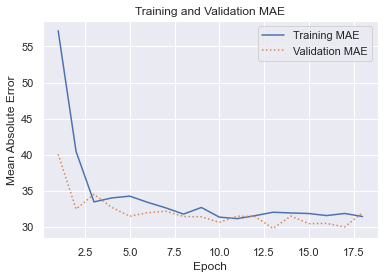

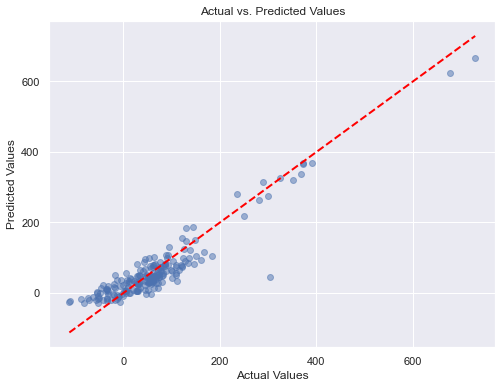

6
Drop: 0.5
Layer one 96
Layer two 192

Epoch 1: val_mae improved from inf to 34.76347, saving model to weights.best.h5


/Users/jesperhelen/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae did not improve from 34.76347

Epoch 3: val_mae improved from 34.76347 to 31.64965, saving model to weights.best.h5

Epoch 4: val_mae did not improve from 31.64965

Epoch 5: val_mae did not improve from 31.64965

Epoch 6: val_mae improved from 31.64965 to 31.24893, saving model to weights.best.h5

Epoch 7: val_mae improved from 31.24893 to 30.66760, saving model to weights.best.h5

Epoch 8: val_mae improved from 30.66760 to 29.87152, saving model to weights.best.h5

Epoch 9: val_mae did not improve from 29.87152

Epoch 10: val_mae did not improve from 29.87152

Epoch 11: val_mae did not improve from 29.87152

Epoch 12: val_mae did not improve from 29.87152

Epoch 13: val_mae did not improve from 29.87152
7/7 [==============================] - 0s 2ms/step
--------------------------------------this is result of the trained model---------------------------------------------
Mean Absolute Error: 29.489383400827645
Mean Squared Error: 1537.6142880437517
R-squared: 0.869671

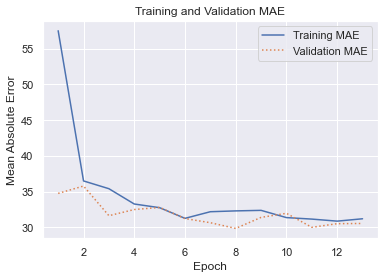

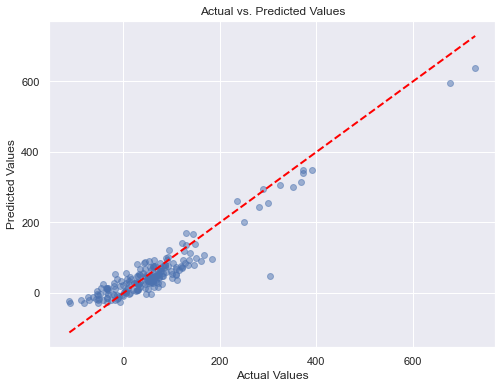

7
Drop: 0.4
Layer one 112
Layer two 224

Epoch 1: val_mae improved from inf to 32.48122, saving model to weights.best.h5

Epoch 2: val_mae did not improve from 32.48122


/Users/jesperhelen/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_mae improved from 32.48122 to 31.78407, saving model to weights.best.h5

Epoch 4: val_mae did not improve from 31.78407

Epoch 5: val_mae improved from 31.78407 to 31.75247, saving model to weights.best.h5

Epoch 6: val_mae did not improve from 31.75247

Epoch 7: val_mae improved from 31.75247 to 31.17743, saving model to weights.best.h5

Epoch 8: val_mae did not improve from 31.17743

Epoch 9: val_mae improved from 31.17743 to 30.47732, saving model to weights.best.h5

Epoch 10: val_mae did not improve from 30.47732

Epoch 11: val_mae did not improve from 30.47732

Epoch 12: val_mae did not improve from 30.47732

Epoch 13: val_mae did not improve from 30.47732

Epoch 14: val_mae improved from 30.47732 to 30.45123, saving model to weights.best.h5

Epoch 15: val_mae did not improve from 30.45123

Epoch 16: val_mae did not improve from 30.45123

Epoch 17: val_mae did not improve from 30.45123

Epoch 18: val_mae did not improve from 30.45123

Epoch 19: val_mae improved from 

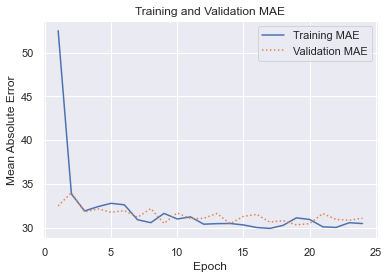

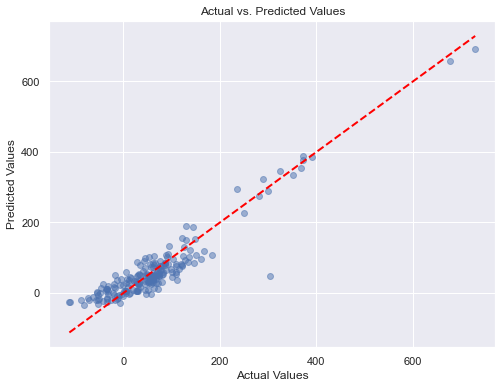

8
Drop: 0.3
Layer one 128
Layer two 256

Epoch 1: val_mae improved from inf to 35.51052, saving model to weights.best.h5

Epoch 2: val_mae improved from 35.51052 to 31.79962, saving model to weights.best.h5


/Users/jesperhelen/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_mae did not improve from 31.79962

Epoch 4: val_mae improved from 31.79962 to 31.64074, saving model to weights.best.h5

Epoch 5: val_mae improved from 31.64074 to 31.48426, saving model to weights.best.h5

Epoch 6: val_mae improved from 31.48426 to 30.46902, saving model to weights.best.h5

Epoch 7: val_mae did not improve from 30.46902

Epoch 8: val_mae did not improve from 30.46902

Epoch 9: val_mae did not improve from 30.46902

Epoch 10: val_mae did not improve from 30.46902

Epoch 11: val_mae did not improve from 30.46902
7/7 [==============================] - 0s 3ms/step
--------------------------------------this is result of the trained model---------------------------------------------
Mean Absolute Error: 28.121503335498275
Mean Squared Error: 1441.350273358465
R-squared: 0.8778308657245165
7/7 [==============================] - 0s 2ms/step
--------------------------------------this is result of the model loaded from the local path-------------------------------

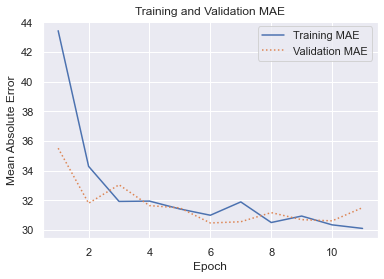

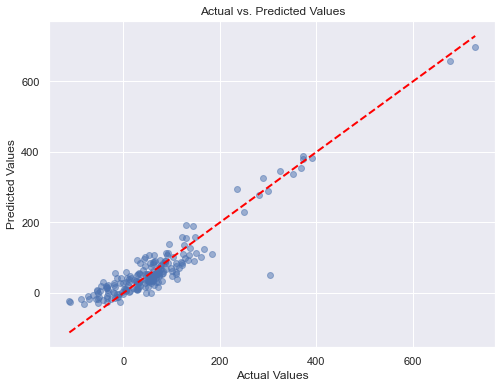

9
Drop: 0.2
Layer one 144
Layer two 288

Epoch 1: val_mae improved from inf to 33.91617, saving model to weights.best.h5

Epoch 2: val_mae improved from 33.91617 to 30.74257, saving model to weights.best.h5


/Users/jesperhelen/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_mae did not improve from 30.74257

Epoch 4: val_mae improved from 30.74257 to 30.71456, saving model to weights.best.h5

Epoch 5: val_mae did not improve from 30.71456

Epoch 6: val_mae improved from 30.71456 to 29.47226, saving model to weights.best.h5

Epoch 7: val_mae did not improve from 29.47226

Epoch 8: val_mae did not improve from 29.47226

Epoch 9: val_mae did not improve from 29.47226

Epoch 10: val_mae did not improve from 29.47226

Epoch 11: val_mae did not improve from 29.47226
7/7 [==============================] - 0s 3ms/step
--------------------------------------this is result of the trained model---------------------------------------------
Mean Absolute Error: 28.48494856237434
Mean Squared Error: 1467.8316317186068
R-squared: 0.8755863005517781
7/7 [==============================] - 0s 2ms/step
--------------------------------------this is result of the model loaded from the local path---------------------------------------------
Mean Absolute Error: 28

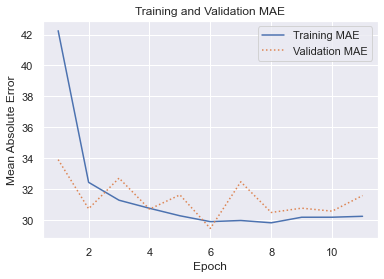

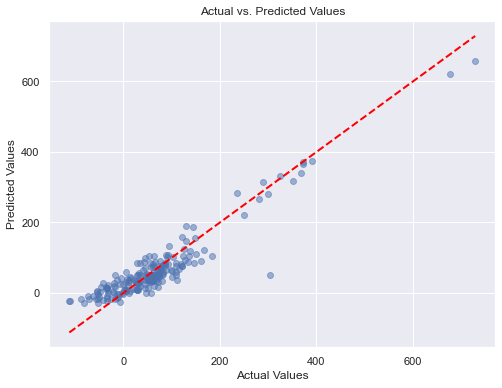

In [10]:
for i in range(1,10):
    print(i)
    model=construct_network_model(i)
    # Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
    # and MAE metric to be used during training.
    model.compile(optimizer='adam', loss='mae', metrics=['mae'])
    early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

    # Create a ReduceLROnPlateau callback to monitor val_mae.
    # It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
    reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

    # Define the file path where the best model weights will be saved.
    filepath = "weights.best.h5"
    # Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
    # The callback will save thhe model's weights only if the validation mae improves.
    checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

    # Train the model using the fit method.
    hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

    #************************************************Here you can choose to use the callback function or not*************

    #-------------------------------------------------model evaluation--------------------------------------------------------------------

    # Set the style of the plots using Seaborn.
    sns.set()

    # Extract the training and validation Mean Absolute Error (MAE) from the training history.
    err = hist.history['mae']
    val_err = hist.history['val_mae']

    # Define the number of epochs.
    epochs = range(1, len(err) + 1)

    # Plot the Training MAE and Validation MAE over epochs.
    plt.plot(epochs, err, '-', label='Training MAE')
    plt.plot(epochs, val_err, ':', label='Validation MAE')
    plt.title('Training and Validation MAE')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.legend(loc='upper right')
    plt.plot()

    # Use the trained model to predict on the test data.
    y_pred = model.predict(X_test)

    # Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print('--------------------------------------'+'this is result of the trained model'+"---------------------------------------------")
    # Print the calculated metrics.
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    #-------------------------------------------------load model and evaluation--------------------------------------------------------------------
    if not filepath =="":
      # Load a pre-trained model from the specified file path.
      model = load_model(filepath)

      # Use the loaded model to predict on the test data.
      y_pred = model.predict(X_test)

      # Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
      mae = mean_absolute_error(y_test, y_pred)
      mse = mean_squared_error(y_test, y_pred)
      r2 = r2_score(y_test, y_pred)

      print('--------------------------------------'+'this is result of the model loaded from the local path'+"---------------------------------------------")

      # Print the calculated metrics.
      print(f"Mean Absolute Error: {mae}")
      print(f"Mean Squared Error: {mse}")
      print(f"R-squared: {r2}")



      # Create a scatter plot to visualize the relationship
      plt.figure(figsize=(8, 6))
      plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

      # Add labels and title
      plt.xlabel("Actual Values")
      plt.ylabel("Predicted Values")
      plt.title("Actual vs. Predicted Values")

      # Add a diagonal line for reference (perfect predictions)
      plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

      # Show the plot
      plt.show()